## TF-IDF

In [2]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [3]:
import sys         
sys.path.append('/home/pranisaa/working_dir/Text-Summarization')
from config import *
import pandas as pd
from datasets import load_dataset
from dataset import Dataset
from transformers import T5Tokenizer, BartTokenizer
pd.set_option('display.max_colwidth', None)
import pickle

#### TEST TFIDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
text_tfidf = ['my name is beau', 'my name is fabby', 'i love deep learning']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True) #use_idf bool, default=True (to highlight by comparison) Enable inverse-document-frequency reweighting
x = tfidf_vectorizer.fit_transform(text_tfidf)
print(x.toarray().shape)
# print(tfidf_vectorizer.get_feature_names().shape)
#         tfidfcounts = pd.DataFrame(x.toarray(),index = tfidf_vectorizer.get_feature_names(), columns = ["tfidf"])
tfidfcounts = pd.DataFrame(x.toarray(),index = text_tfidf,  columns = tfidf_vectorizer.get_feature_names())
tfidfcounts

(3, 5)


/home/pranisaa/thesis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,beau,deep,fabby,learning,love
my name is beau,1.0,0.00000,0.0,0.00000,0.00000
my name is fabby,0.0,0.00000,1.0,0.00000,0.00000
i love deep learning,0.0,0.57735,0.0,0.57735,0.57735


### Load dataset

In [5]:
# Load dataset
data = 'xsum'

if data == 'cnn_dailymail':
    dataset = load_dataset(data, '3.0.0')
    source_text = "article"
    target_text = "highlights"
elif data == "xsum":
    dataset = load_dataset(data)
    source_text = "document"
    target_text = "summary"
else:
    raise ValueError("Undefined dataset")

Using custom data configuration default
Reusing dataset xsum (/home/pranisaa/.cache/huggingface/datasets/xsum/default/1.2.0/32c23220eadddb1149b16ed2e9430a05293768cfffbdfd151058697d4c11f934)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

### Get dataset

In [7]:
pickle_in = open("val_len_q1_max512.pickle","rb")
example_dict = pickle.load(pickle_in)
q1_id = example_dict['ids']

pickle_in = open("val_len_q3_max512.pickle","rb")
example_dict = pickle.load(pickle_in)
q3_id = example_dict['ids']

In [8]:
df_data = {'id': dataset['validation']['id'], 'document': dataset['validation']['document']}

In [9]:
val_doc_q1 = {'ids': [], 'document': []}
for idx in q1_id:
    val_doc_q1['ids'].append(idx)
    document = df_data['document'][df_data['id'] == str(idx)]
    val_doc_q1['document'].append(document)
    
val_doc_q3 = {'ids': [], 'document': []}
for idx in q3_id:
    val_doc_q3['ids'].append(idx)
    document = str(df_data['document'][df_data['id'] == str(idx)])
    val_doc_q3['document'].append(document)

In [10]:
print(len(val_doc_q1['document']))
print(len(val_doc_q3['ids']))

100
102


In [18]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [19]:
import nltk

In [20]:
# nltk.download('wordnet')

In [21]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [22]:
processed_docs = pd.Series(val_doc_q1['document']).map(preprocess)
processed_docs[:10]

NameError: name 'stemmer' is not defined

In [38]:
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation as LDA
# from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pranisaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
count_vect = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts = count_vect.fit_transform(val_doc_q1['document'])
x_counts.todense()
count_vect.get_feature_names()


['2008',
 '2014',
 '37',
 '42',
 '44',
 '50',
 'allegedly',
 'appearing',
 'bail',
 'bailey',
 'bexley',
 'bright',
 'brothers',
 'charge',
 'charged',
 'charges',
 'charity',
 'defender',
 'denied',
 'due',
 'earlier',
 'efe',
 'elder',
 'ex',
 'foundation',
 'four',
 'fraudulent',
 'greater',
 'jointly',
 'july',
 'kent',
 'manchester',
 'money',
 'mr',
 'nigerian',
 'offence',
 'offences',
 'old',
 'place',
 'raise',
 'reading',
 'relates',
 'relating',
 'released',
 'sam',
 'sodje',
 'sport',
 'sports',
 'stand',
 'stephen',
 'took',
 'trading',
 'trial']

In [48]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)
dimension = 2
lda = LDA(n_components = dimension)
lda_array = lda.fit_transform(x_tfidf)
lda_array


array([[0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.92718735, 0.07281265],
       [0.

In [50]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect.get_feature_names()
important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:10] for j in range(len(components))]
important_words

[['sodje',
  'bright',
  'stephen',
  'denied',
  'efe',
  'sam',
  'jointly',
  'foundation',
  'reading',
  '2014'],
 ['efe',
  'denied',
  'stephen',
  'allegedly',
  'bright',
  'sodje',
  'due',
  'released',
  'charges',
  'fraudulent']]

In [45]:
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
gps_news_matrix = tf_vectorizer.fit_transform(val_doc_q1['document'])
lda = LatentDirichletAllocation(n_components=5, learning_method='online', random_state=0, verbose=0, n_jobs = -1)
lda_model = lda.fit(gps_news_matrix)
lda_matrix = lda_model.transform(gps_news_matrix)
# lda_matrix

In [211]:
def print_topics(model, count_vectorizer, n_top_words):
    words = tf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
      
        print("\nTopic #%d:" % topic_idx )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model, gps_news_matrix,20)

Topics found via LDA:

Topic #0:
efe charged sodje bright 37 2008 charity bexley defender denied elder took sports stephen allegedly reading charge stand raise bail

Topic #1:
efe denied sodje bright stephen reading bailey nigerian 2008 money allegedly charged bexley relating brothers 37 stand fraudulent kent charge

Topic #2:
denied sodje ex bail stephen bright bailey efe reading brothers relates offence sam old charge 2008 sports relating allegedly greater

Topic #3:
denied stephen bright efe sodje charge allegedly 2014 bail bexley jointly released place raise foundation charity 42 relating 37 mr

Topic #4:
denied sodje bright efe stephen old nigerian offences foundation 44 place sam took sport kent ex mr bexley offence brothers


/home/pranisaa/thesis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [205]:
# print_topics(lda_model, gps_news_matrix, 15)

/home/pranisaa/thesis/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.785118
[t-SNE] KL divergence after 400 iterations: 0.000002


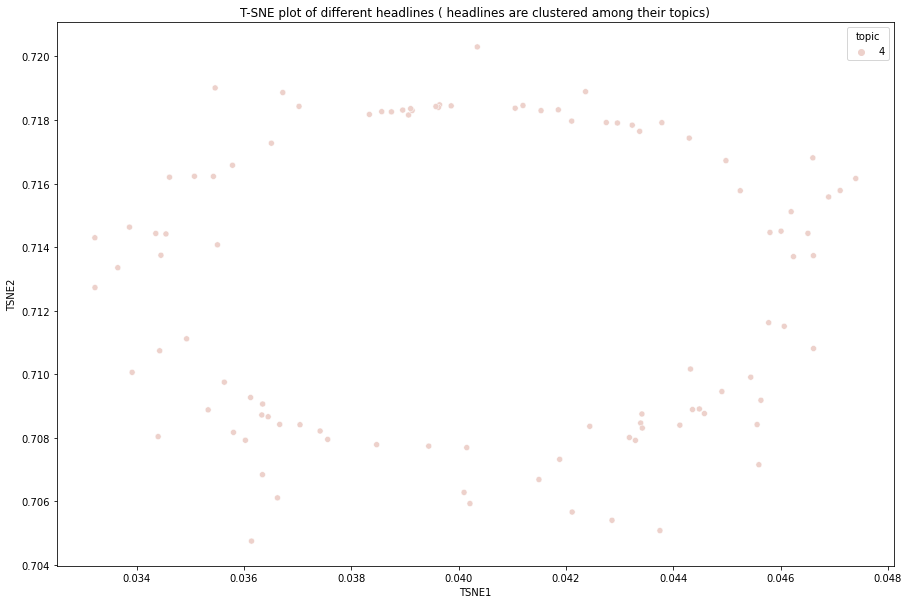

In [209]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(lda_matrix)
df = pd.DataFrame(tsne_features)
df['topic'] = lda_matrix.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()

In [210]:
df['topic']

0     4
1     4
2     4
3     4
4     4
     ..
95    4
96    4
97    4
98    4
99    4
Name: topic, Length: 100, dtype: int64